In [108]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pylab as plt
import os

filepath=os.path.split(os.getcwd())[0]

col_names=['Gender','Symptoms','Alcohol','Hep_b_surf_antigen','Hep_b_e_antigen','Hep_b_core_antibody',\
           'Hep_c_vir_antibody','Cirrhosis','Endemic_countries','Smoking','Diabetes','Obesity','Hemochromatosis',\
           'Arterial_hypertension','Chronic_ren_insufficiency','HIV','Nonalcoholic_steatohepatitis',\
           'Esophageal_varices','Splenomegaly','Portal_hypertension','Portal_vein_thrombosis','Liver_metastasis','Radiological_hallmark',\
           'Age','Grams_alc_per_day','Packs_cigarettes_per_year','Performance_status','Encefalopathy_degree',\
           'Ascites_degree','International_norm_ratio','Alpha-Fetoprotein','Hemoglobin','Mean_corp_volume',\
           'Leukocytes','Platelets','Albumin','Total_bilirubin','Alanine_transaminase','Aspartate_transaminase',\
           'Gamma_glutamyl_transferase','Alkaline_phosphatase','Total_proteins','Creatinine','Nodule_num',\
           'Nodule_dim','Direct_bilirubin','Iron','Oxygen_saturation','Ferritin','Class']
df=pd.read_table(os.path.join(filepath,'data','hcc-data.txt'),sep=',',header=None,names=col_names,na_values="?")
# print(df.dtypes)
# print(df.isnull().sum(axis=0))

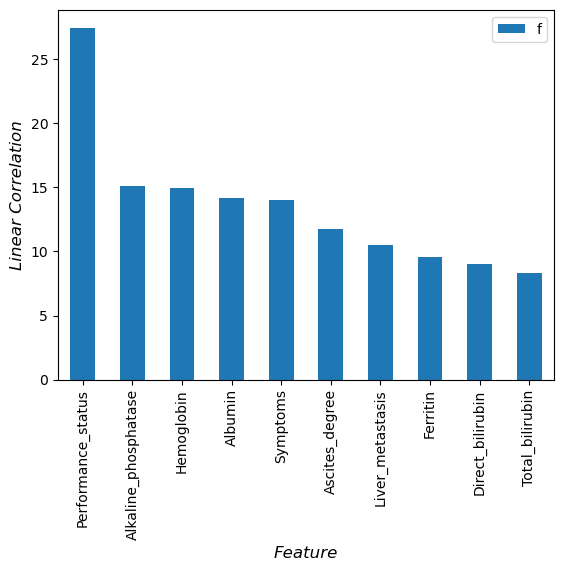

In [109]:
from sklearn.feature_selection import f_classif
#Linear correlation - F-stat
xcopy=X.copy()
f_list=[]
for column in X.columns:
    column_df=df[[column, 'Class']].dropna()
    f_stat,_=f_classif(column_df[column].to_numpy().reshape(-1, 1), column_df['Class'])
    f_list.append(float(f_stat))
f_stats=pd.DataFrame({'f':f_list,'features':X.columns})
f_sorted=f_stats.sort_values(by='f',ascending=False)
f_sorted.iloc[:10].plot.bar('features','f')
plt.ylabel('Linear Correlation',fontsize='large',fontstyle='oblique')
plt.xlabel('Feature',fontsize='large',fontstyle='oblique')
plt.show()

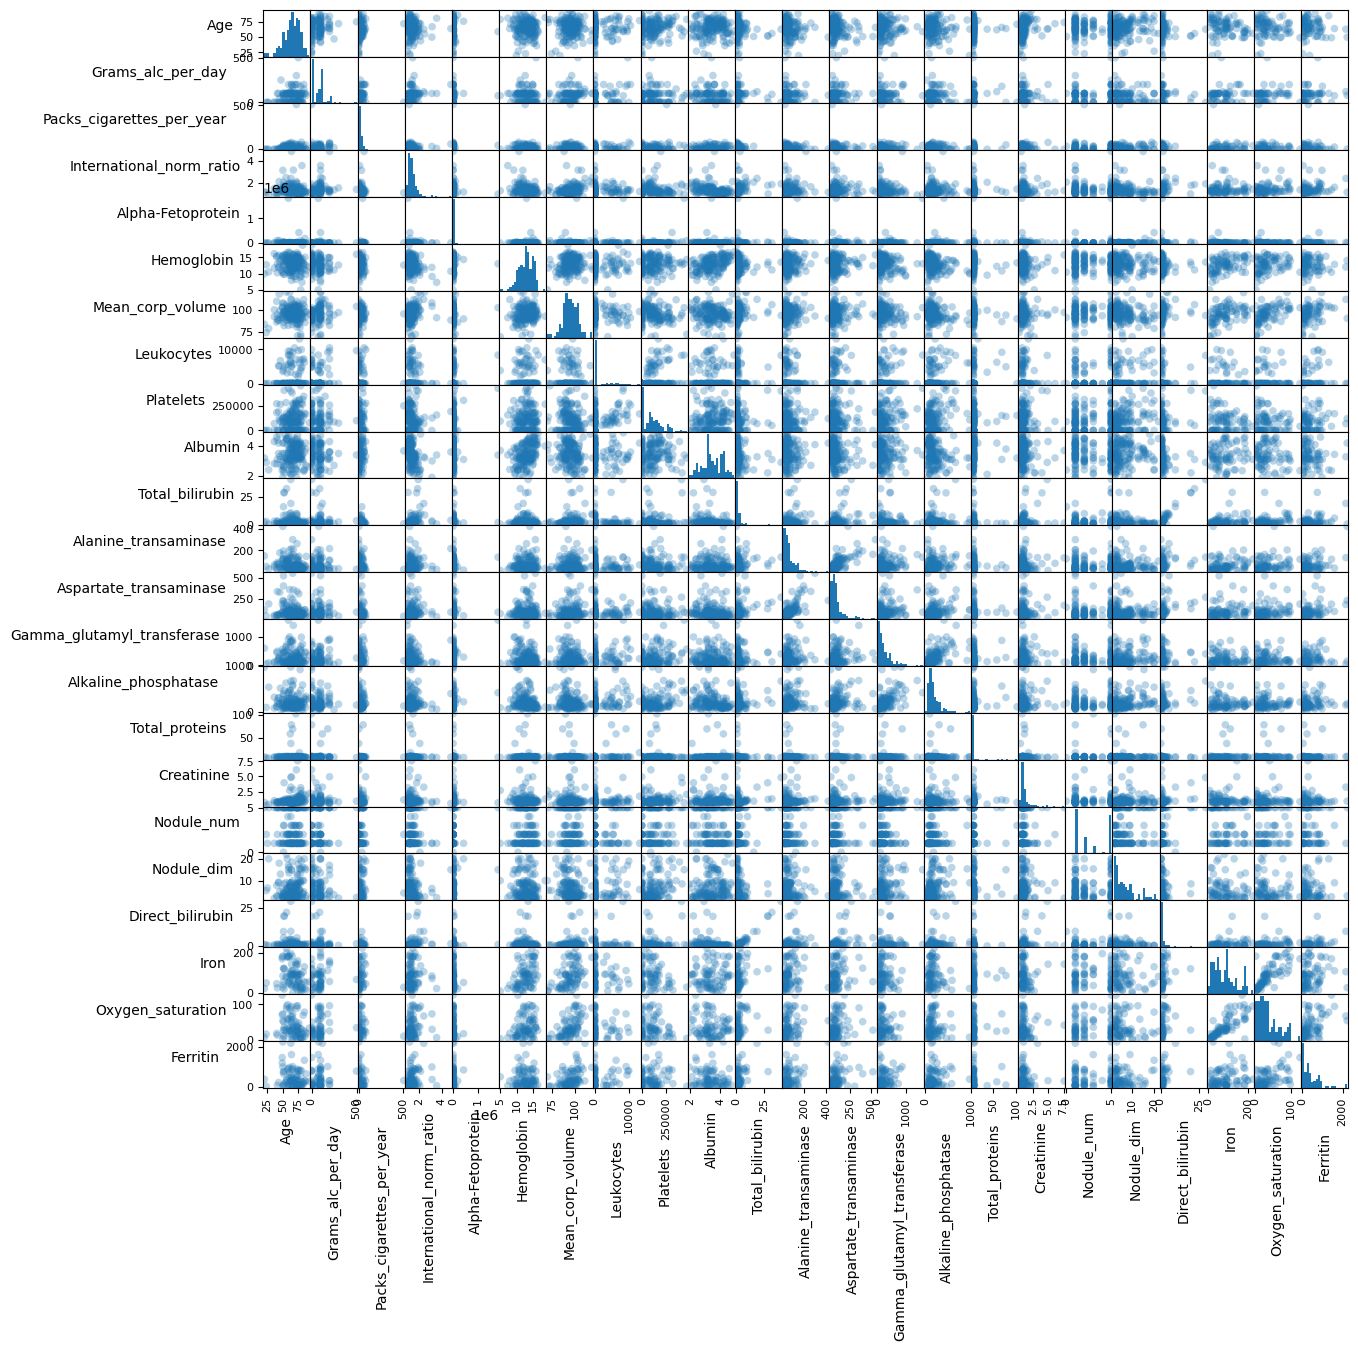

Class
1    102
0     63
dtype: int64


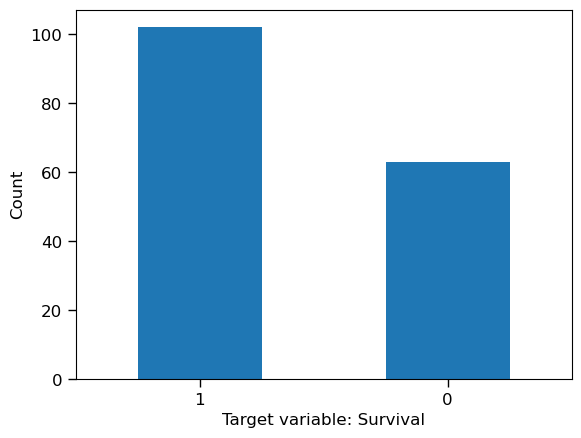

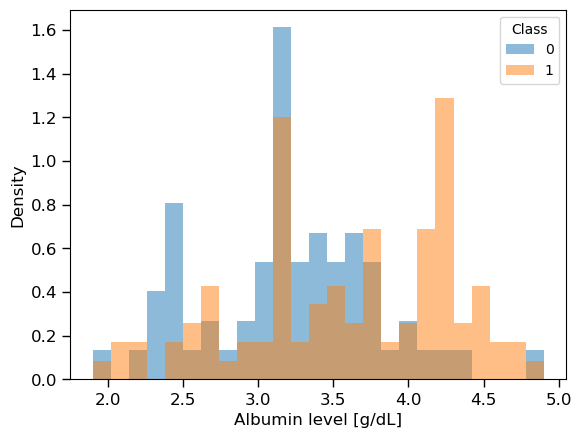

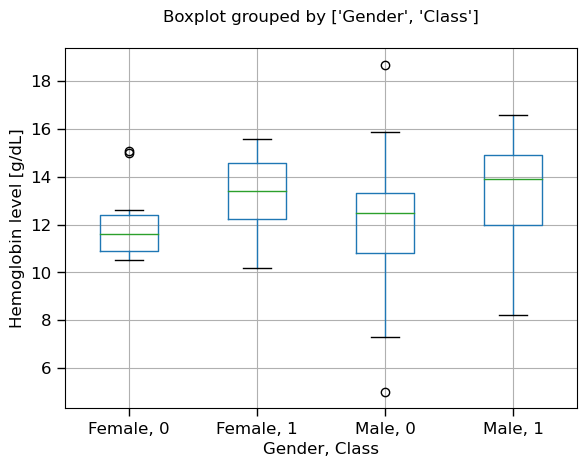

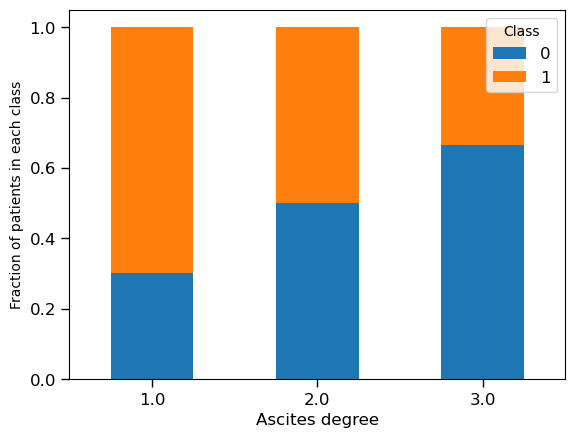

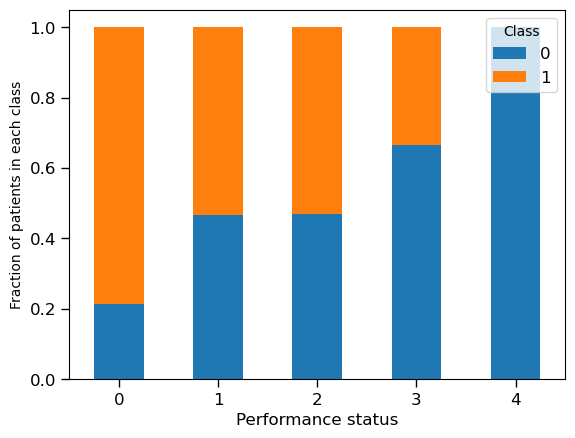

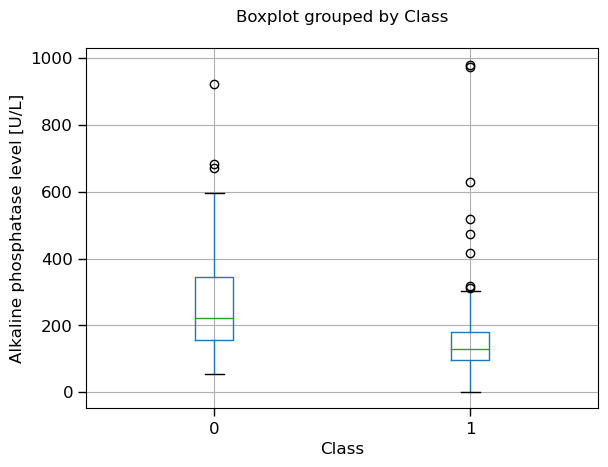

In [110]:
# for column in df.columns:
#     print(df.value_counts(column))

std_ftrs=['Age','Grams_alc_per_day','Packs_cigarettes_per_year','International_norm_ratio','Alpha-Fetoprotein',\
          'Hemoglobin','Mean_corp_volume','Leukocytes','Platelets','Albumin','Total_bilirubin','Alanine_transaminase',\
          'Aspartate_transaminase','Gamma_glutamyl_transferase','Alkaline_phosphatase','Total_proteins','Creatinine',\
          'Nodule_num','Nodule_dim','Direct_bilirubin','Iron','Oxygen_saturation','Ferritin']

axes=pd.plotting.scatter_matrix(df[std_ftrs], figsize=(14, 14), marker='o',hist_kwds={'bins': 20}, 
                       s=30, alpha=.3)
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')
plt.savefig(os.path.join(filepath,'figures','matrix.png'), dpi=300, bbox_inches = "tight")
plt.show()

print(df.value_counts('Class'))
pd.value_counts(df['Class']).plot.bar()
plt.xlabel('Target variable: Survival',fontsize='large')
plt.ylabel('Count',fontsize='large')
plt.xticks(rotation=0)
plt.tick_params(axis='both', which='major', labelsize=12, width=1, length=6)
plt.savefig(os.path.join(filepath,'figures','fig1.png'), dpi=300, bbox_inches = "tight")
plt.show()

bin_range = (df['Albumin'].min(),df['Albumin'].max())
for c in [0,1]:
    plt.hist(df[df['Class']==c]['Albumin'],alpha=0.5,label=c,range=bin_range,bins=25,density=True)
plt.legend(title='Class')
plt.ylabel('Density',fontsize='large')
plt.xlabel('Albumin level [g/dL]',fontsize='large')
plt.tick_params(axis='both', which='major', labelsize=12, width=1, length=6)
plt.savefig(os.path.join(filepath,'figures','fig2.png'), dpi=300, bbox_inches = "tight")
plt.show()

df[['Class','Hemoglobin','Gender']].boxplot(by=['Gender','Class'])
labels=['Female, 0','Female, 1','Male, 0','Male, 1']
plt.ylabel('Hemoglobin level [g/dL]',fontsize='large')
plt.xlabel('Gender, Class',fontsize='large')
plt.xticks([1,2,3,4],labels)
plt.tick_params(axis='both', which='major', labelsize=12, width=1, length=6)
plt.title('')
plt.savefig(os.path.join(filepath,'figures','fig11.png'), dpi=300, bbox_inches = "tight")

count_matrix = df.groupby(['Ascites_degree','Class']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('Fraction of patients in each class')
plt.xlabel('Ascites degree',fontsize='large')
plt.legend(title='Class',fontsize='large')
plt.xticks(rotation=0)
plt.tick_params(axis='both', which='major', labelsize=12, width=1, length=6)
plt.savefig(os.path.join(filepath,'figures','fig3.png'), dpi=300, bbox_inches = "tight")
            
count_matrix = df.groupby(['Performance_status','Class']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('Fraction of patients in each class')
plt.xlabel('Performance status',fontsize='large')
plt.legend(title='Class',fontsize='large')
plt.xticks(rotation=0)
plt.tick_params(axis='both', which='major', labelsize=12, width=1, length=6)
plt.savefig(os.path.join(filepath,'figures','fig10.png'), dpi=300, bbox_inches = "tight")

df[['Class','Alkaline_phosphatase']].boxplot(by='Class')
plt.ylabel('Alkaline phosphatase level [U/L]',fontsize='large')
plt.xlabel('Class',fontsize='large')
plt.tick_params(axis='both', which='major', labelsize=12, width=1, length=6)
plt.title('')
plt.savefig(os.path.join(filepath,'figures','fig4.png'), dpi=300, bbox_inches = "tight")
plt.show()



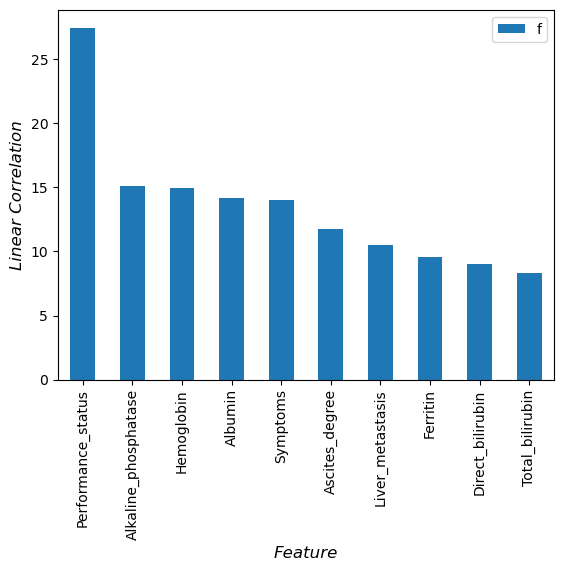

In [111]:
from sklearn.feature_selection import f_classif, mutual_info_classif
#Linear correlation - F-stat
xcopy=X.copy()
f_list=[]
for column in X.columns:
    column_df=df[[column, 'Class']].dropna()
    f_stat,_=f_classif(column_df[column].to_numpy().reshape(-1, 1), column_df['Class'])
    f_list.append(float(f_stat))
f_stats=pd.DataFrame({'f':f_list,'features':X.columns})
f_sorted=f_stats.sort_values(by='f',ascending=False)
f_sorted.iloc[:10].plot.bar('features','f')
plt.ylabel('Linear Correlation',fontsize='large',fontstyle='oblique')
plt.xlabel('Feature',fontsize='large',fontstyle='oblique')
plt.show()

Fraction of features with missing values:  0.898
Fraction of data points with missing values:  0.9515
Fraction of data points with missing values for a continuous feature:  0.8364
Average fraction of missing values per feature:  0.10216450216450217


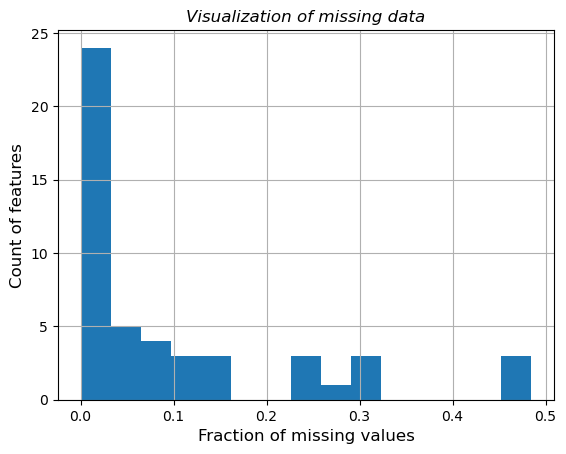

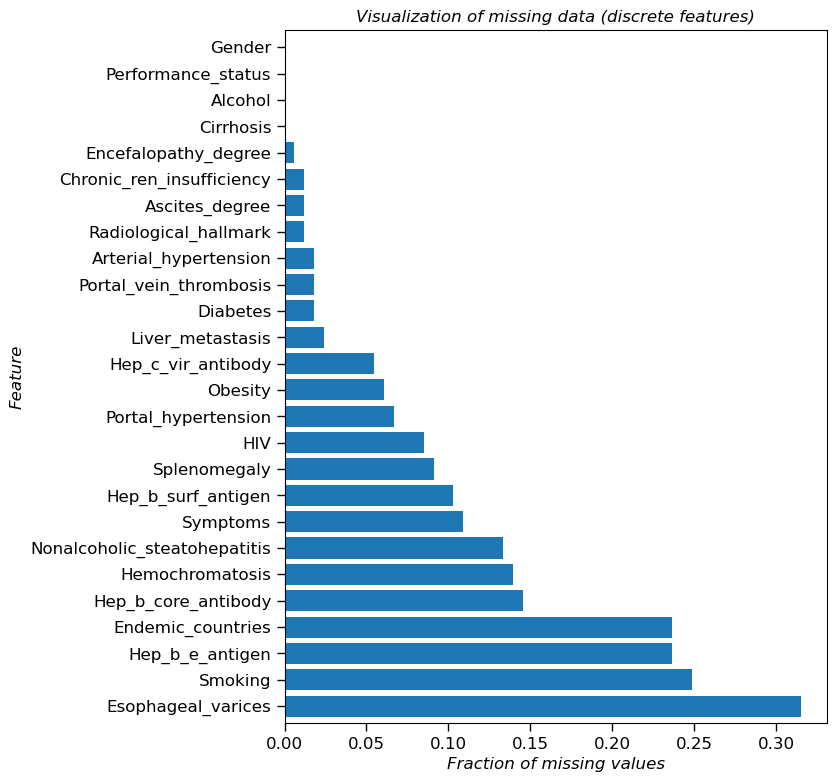

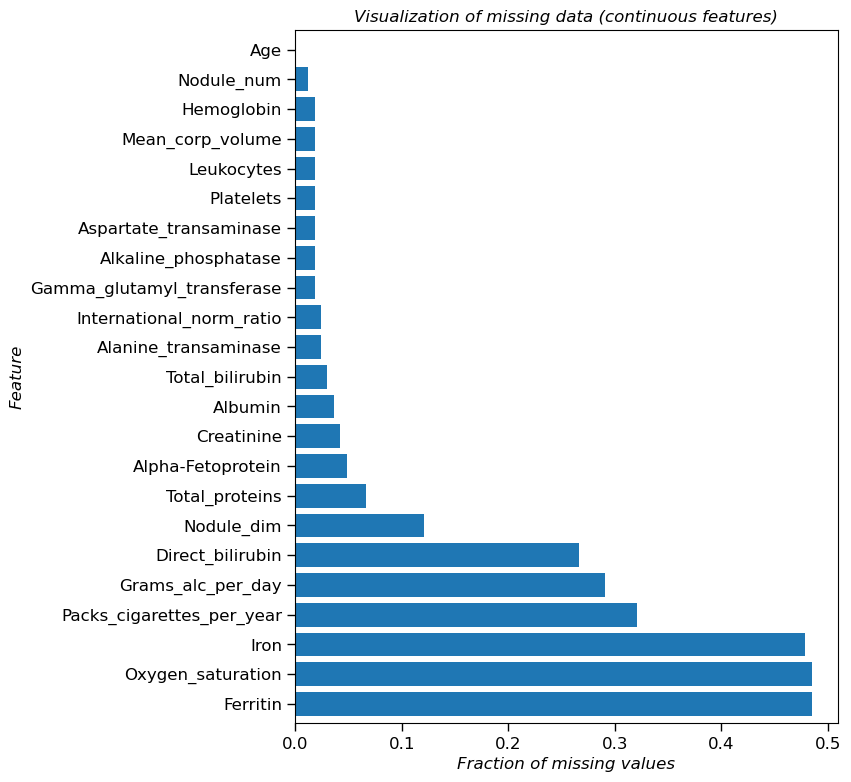

In [112]:
cat_ftrs=['Gender','Symptoms','Alcohol','Hep_b_surf_antigen','Hep_b_e_antigen','Hep_b_core_antibody',\
          'Hep_c_vir_antibody','Cirrhosis','Endemic_countries','Smoking','Diabetes','Obesity','Hemochromatosis',\
          'Arterial_hypertension','Chronic_ren_insufficiency','HIV','Nonalcoholic_steatohepatitis',\
          'Esophageal_varices','Splenomegaly','Portal_hypertension','Portal_vein_thrombosis','Liver_metastasis','Radiological_hallmark']
ord_ftrs=['Performance_status','Encefalopathy_degree','Ascites_degree']
std_ftrs=['Age','Grams_alc_per_day','Packs_cigarettes_per_year','International_norm_ratio','Alpha-Fetoprotein',\
          'Hemoglobin','Mean_corp_volume','Leukocytes','Platelets','Albumin','Total_bilirubin','Alanine_transaminase',\
          'Aspartate_transaminase','Gamma_glutamyl_transferase','Alkaline_phosphatase','Total_proteins','Creatinine',\
          'Nodule_num','Nodule_dim','Direct_bilirubin','Iron','Oxygen_saturation','Ferritin']
y=df['Class']
X=df.loc[:, df.columns != 'Class']
rs=1

#Missing values
perc_missing_per_ftr = X.isnull().sum(axis=0)/X.shape[0]
missing_sorted=perc_missing_per_ftr.sort_values(ascending = True)
print('Fraction of features with missing values: ',np.around(sum(X.isnull().sum(axis=0)!=0)/X.shape[1],4))
print('Fraction of data points with missing values: ',np.around(sum(X.isnull().sum(axis=1)!=0)/X.shape[0],4))
print('Fraction of data points with missing values for a continuous feature: ',np.around(sum(X[std_ftrs].isnull().sum(axis=1)!=0)/X[std_ftrs].shape[0],4))
print('Average fraction of missing values per feature: ',np.mean(perc_missing_per_ftr))
cat_df=X[cat_ftrs]
onehot_ftrs=(cat_df.columns[cat_df.isnull().any()])

# print('fraction of missing values in features:')
# print(missing_sorted)

# pd.set_option('display.max_rows', None)
# print(df[['Total_bilirubin','Direct_bilirubin']].isnull())

missing_sorted.hist(bins=15)
plt.xlabel('Fraction of missing values', fontsize='large')
plt.ylabel('Count of features', fontsize='large')
plt.title('Visualization of missing data', fontsize='large',fontstyle='oblique')
plt.savefig(os.path.join(filepath,'figures','fig5.png'), dpi=300, bbox_inches = "tight")

plt.figure(figsize=(7,9))
(X[cat_ftrs+ord_ftrs].isnull().sum(axis=0)/X[cat_ftrs+ord_ftrs].shape[0]).sort_values(ascending=False).plot.barh(width=.8)
plt.xlabel('Fraction of missing values',fontsize='large',fontstyle='oblique')
plt.ylabel('Feature',fontsize='large',fontstyle='oblique')
plt.title('Visualization of missing data (discrete features)',fontsize='large',fontstyle='oblique')
plt.tick_params(axis='both', which='major', labelsize=12, width=1, length=6)
plt.savefig(os.path.join(filepath,'figures','fig6.png'), dpi=300, bbox_inches = "tight")

plt.figure(figsize=(7,9))
(X[std_ftrs].isnull().sum(axis=0)/X[std_ftrs].shape[0]).sort_values(ascending=False).plot.barh(width=.8)
plt.xlabel('Fraction of missing values',fontsize='large',fontstyle='oblique')
plt.ylabel('Feature',fontsize='large',fontstyle='oblique')
plt.title('Visualization of missing data (continuous features)',fontsize='large',fontstyle='oblique')
plt.tick_params(axis='both', which='major', labelsize=12, width=1, length=6)
plt.savefig(os.path.join(filepath,'figures','fig7.png'), dpi=300, bbox_inches = "tight")


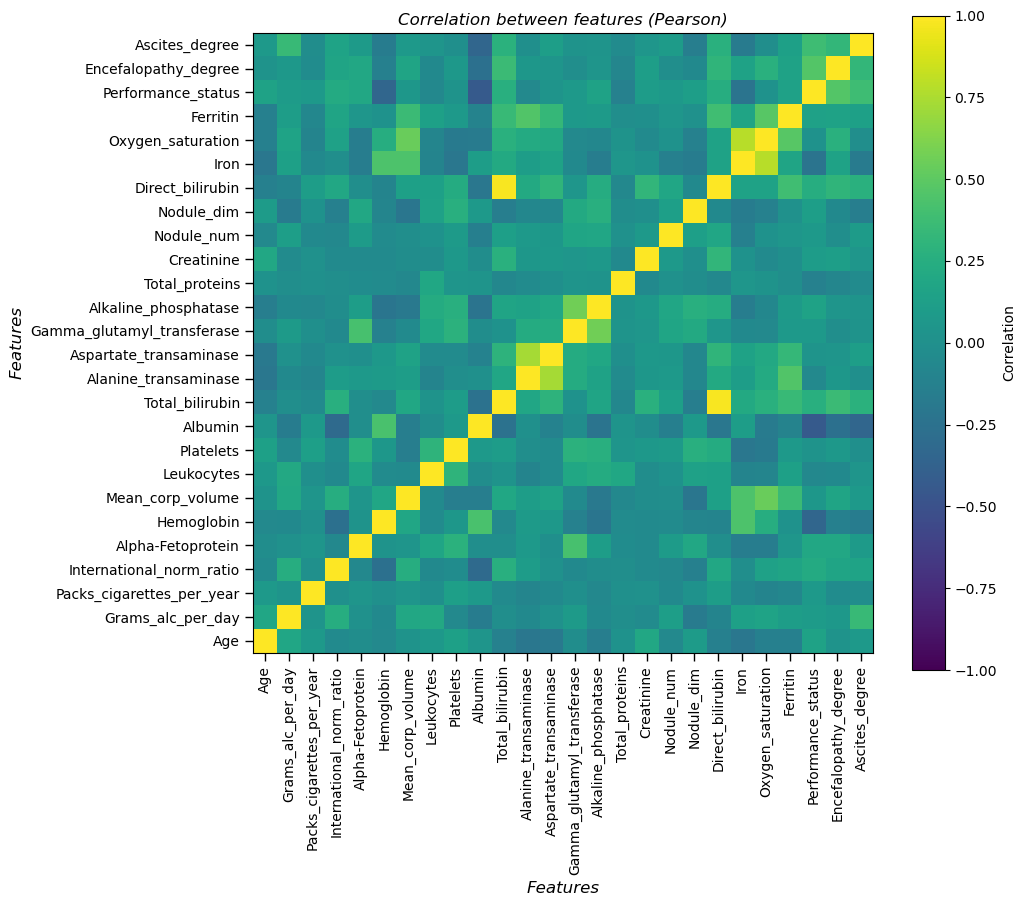

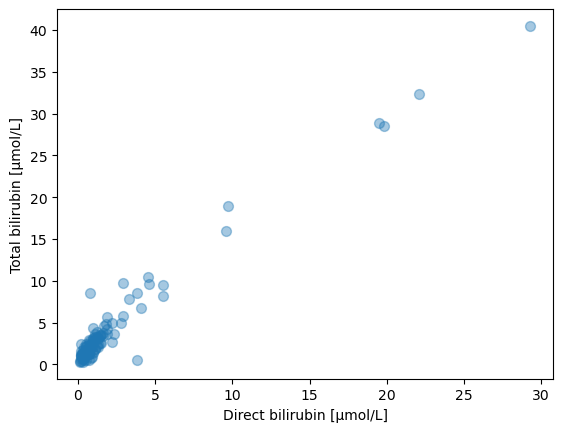

In [113]:
corr_df=X[std_ftrs+ord_ftrs].corr(method='pearson')
# print(corr_df)
plt.figure(figsize=(10,10))
plt.imshow(corr_df, origin='lower',vmin=-1) 
plt.xlabel('Features',fontsize='large',fontstyle='oblique')
plt.ylabel('Features',fontsize='large',fontstyle='oblique')
plt.tick_params(axis='both',labelsize=10, width=1, length=6)
plt.xticks(np.arange(0, len(X[std_ftrs+ord_ftrs].columns),1),X[std_ftrs+ord_ftrs].columns,rotation=90)
plt.yticks(np.arange(0, len(X[std_ftrs+ord_ftrs].columns),1),X[std_ftrs+ord_ftrs].columns)
#plt.clim(-1,1)
plt.colorbar(label='Correlation',shrink=.85)
plt.title('Correlation between features (Pearson)',fontsize='large',fontstyle='oblique')
plt.savefig(os.path.join(filepath,'figures','fig8.png'), dpi=300, bbox_inches = "tight")
df.plot.scatter('Direct_bilirubin','Total_bilirubin',s=50,alpha=0.4)
plt.xlabel('Direct bilirubin [µmol/L]')
plt.ylabel('Total bilirubin [µmol/L]')
plt.savefig(os.path.join(filepath,'figures','fig9.png'), dpi=300, bbox_inches = "tight")

In [114]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

#Splitting and preprocessing

X_prep=X.copy()
# X_prep['Performance_status']=X['Performance_status']+1   #If 0 will represent missing values for ordinal features

X_test,X_other,y_test,y_other=train_test_split(X_prep,y,train_size=.2,random_state=rs,shuffle=True)
# print('x_test: ',X_test.shape)

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
        ('std', StandardScaler(), std_ftrs)],
    remainder='passthrough',verbose_feature_names_out=False)

clf = Pipeline(steps=[('preprocessor', preprocessor)])

kf = KFold(n_splits=5,shuffle=True,random_state=rs)
for train_index, val_index in kf.split(X_other,y_other):
    X_train = X_other.iloc[train_index]
    y_train = y_other.iloc[train_index]
    X_val = X_other.iloc[val_index]
    y_val = y_other.iloc[val_index]
#     print("x_train:",X_train.shape)
#     print("x_val:",X_val.shape)
    X_train_prep=pd.DataFrame(clf.fit_transform(X_train),columns=clf.get_feature_names_out())
    X_val_prep=pd.DataFrame(clf.transform(X_val),columns=clf.get_feature_names_out())
#     print("x_train_prep:",X_train_prep.shape)
#     print("x_val_prep:",X_val_prep.shape)
#     print('y_val: ',y_val.value_counts('Class'))
#     print('y_train: ',y_train.value_counts('Class'))

X_test_prep=pd.DataFrame(clf.transform(X_test),columns=clf.get_feature_names_out())
# print('x_test_prep',X_test_prep.shape)
# print(X_train_prep.columns)




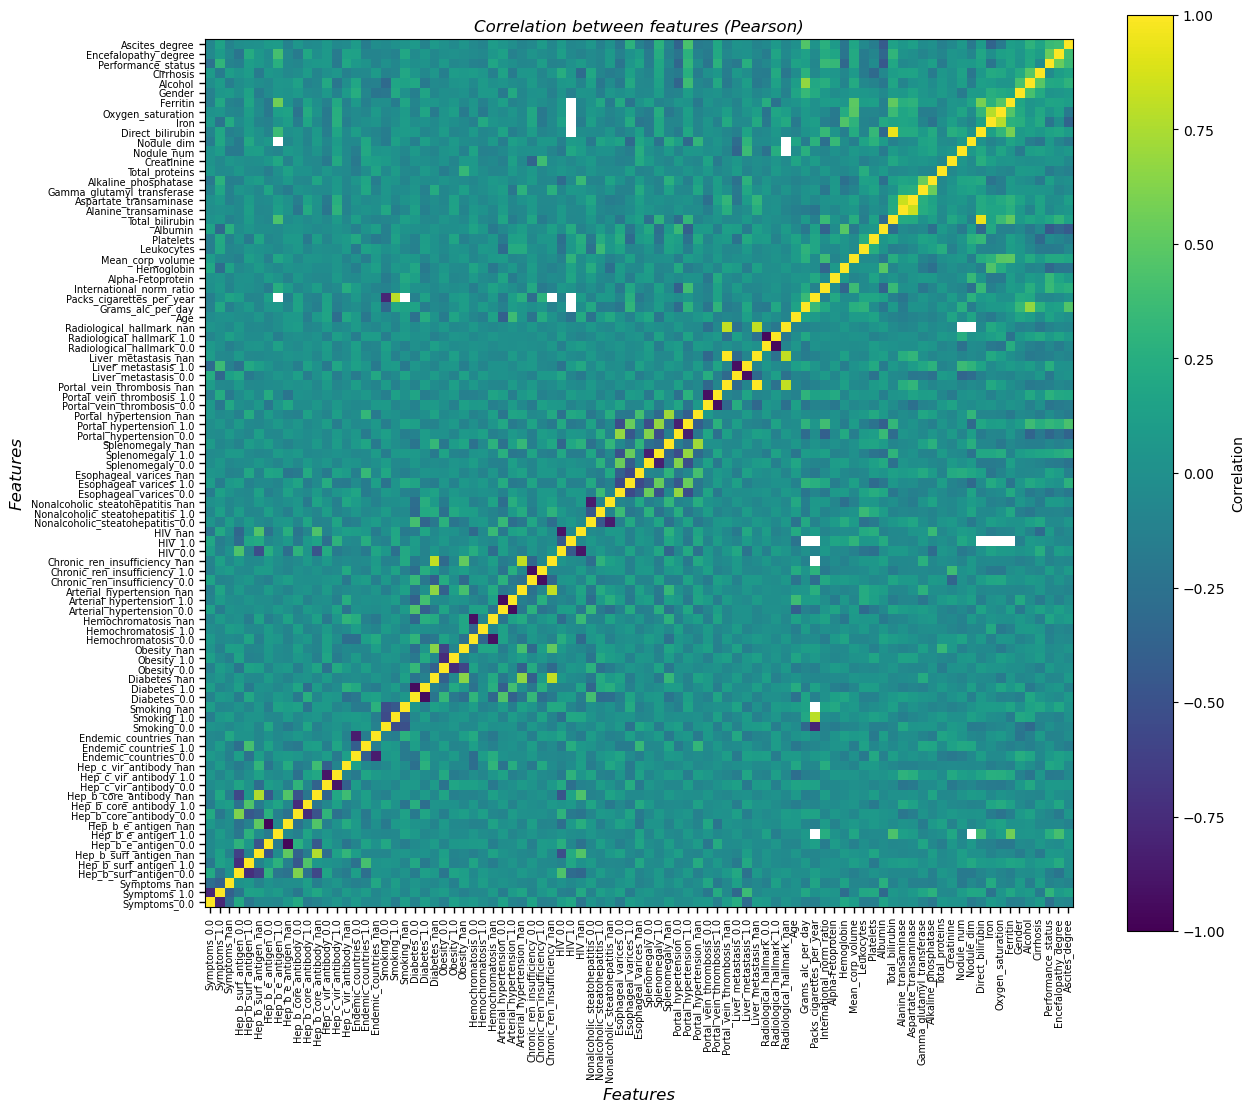

In [115]:
corr_df=X_train_prep.corr(method='pearson')
# print(corr_df)
plt.figure(figsize=(14,14))
plt.imshow(corr_df, origin='lower',vmin=-1) 
plt.xlabel('Features',fontsize='large',fontstyle='oblique')
plt.ylabel('Features',fontsize='large',fontstyle='oblique')
plt.tick_params(axis='both',labelsize=7, width=1, length=4)
plt.xticks(np.arange(0, len(X_train_prep.columns),1),X_train_prep.columns,rotation=90)
plt.yticks(np.arange(0, len(X_train_prep.columns),1),X_train_prep.columns)
#plt.clim(-1,1)
plt.colorbar(label='Correlation',shrink=.85)
plt.title('Correlation between features (Pearson)',fontsize='large',fontstyle='oblique')
plt.savefig(os.path.join(filepath,'figures','fig12.png'), dpi=300, bbox_inches = "tight")
plt.show()